#TASK #1: PROJECT OVERVIEW AND ASSET TYPES

![alt text](https://drive.google.com/uc?id=1TEVVCFWQD8F5mlC7FzD-JM2y54ivYZHT)

![alt text](https://drive.google.com/uc?id=1Z253Wmij7HCEHqPsMdEI56qYqASRrsjn)


![alt text](https://drive.google.com/uc?id=10XxwtKY2qEiNAdTkqNXKhNFZrWvwwKbN)

![alt text](https://drive.google.com/uc?id=1SfBtfOoDigo4ofEvPAwIojqGHpMojL5S)

Links:
- https://www.bankofcanada.ca/rates/interest-rates/canadian-bonds/
- https://ca.finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-tre-srch
- https://investor.vanguard.com/etf/profile/performance/voo
- https://grow.acorns.com/warren-buffett-index-funds/



# TASK #2: IMPORT LIBRARIES & DATASETS AND PERFORM DATA VISUALIZATION

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go
import os

In [3]:
# Read the stock data file
os.getcwd()
df = pd.read_csv('stock.csv')

In [4]:
# Sort the data based on Date
stocks_df = df.sort_values(by=['Date'])
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

**MINI CHALLENGE #1:** 
- **Use Plotly express to visualize raw stock data and normalized ones** 

In [5]:
# normalize function 

def normalize(df):
    x = stocks_df.copy()
    for i in x.columns[1:]:
        x[i] = x[i] / x[i][0] # dividing the iterations through data set by dividing back on row index 0
    return x

In [6]:
stocks_df_norm = normalize(stocks_df)

In [7]:
# interactive plot for visualisation 

def plotfunc(df,title): # takes params (df, title)
    fig = px.line(title=title) # plotly express as px .line() because line plot with title arg
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y=df[i], name = i)
    fig.show()
    
    

In [8]:
plotfunc(stocks_df, "Interactive Stocks Plot")

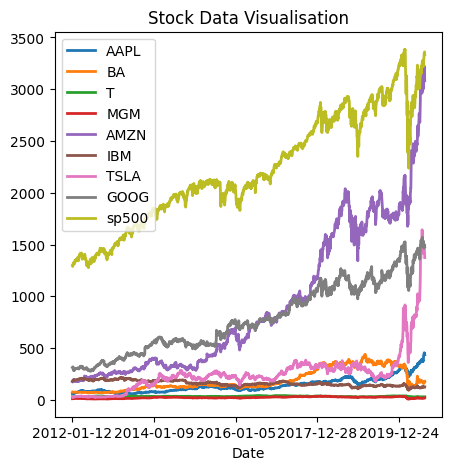

In [9]:
stocks_df.plot(x = 'Date', figsize=(5,5), linewidth=2, title='Stock Data Visualisation');

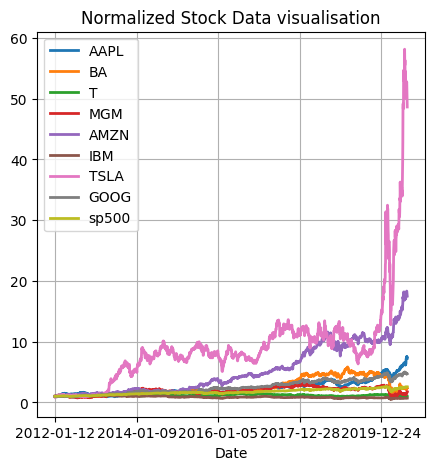

In [10]:
stocks_df_norm.plot(x = 'Date',figsize=(5,5), linewidth=2, title='Normalized Stock Data visualisation')
plt.grid()

In [11]:
# Plot the normalized data in interactive plot: 

plotfunc(stocks_df_norm, "Normalized Interactive Stocks Plot")

# TASK #3: UNERSTAND THE CONCEPT OF ASSET ALLOCATION

![alt text](https://drive.google.com/uc?id=17SLLaxLeP6vlXH6MltEQMFNbt5u-J6iK)

![alt text](https://drive.google.com/uc?id=1qLML-ejBIKR8Bv8aeItfNaJuhq5GzvJ5)

![alt text](https://drive.google.com/uc?id=1iR3WYvU9SYVRqhKwR91x0AsE5sGQtFhz)

**MINI CHALLENGE #2:**
- **What is the common advice that financial advisors generally give to retired seniors when it comes to asset allocations?**

In [12]:
# Invest in low risk assets ; the rule of thumb is take 100, minus investor age, then the remaining figure is the figure to invest in stocks 

# TASK #4: PERFORM RANDOM ASSET ALLOCATION AND CALCULATE PORTFOLIO DAILY RETURN

In [76]:
# create portfolio wegihts 
# weights must sum to 1 


# set random seed - the seed persists value as per lecture
#np.random.seed(101)

# create random weights 
weights = np.array(np.random.random(9))


In [77]:
weights = weights / np.sum(weights)

print(weights)
print(weights.sum())

[0.13203121 0.16051928 0.00351729 0.14427142 0.19018259 0.14389087
 0.05393636 0.15179805 0.01985293]
1.0000000000000002


In [78]:
# Normalize the stock avalues 
df_portfolio = normalize(stocks_df)
df_portfolio

Date      AAPL        BA         T       MGM       AMZN       IBM  \
0     2012-01-12  1.000000  1.000000  1.000000  1.000000   1.000000  1.000000   
1     2012-01-13  0.996251  0.987949  0.998340  1.018137   1.014153  0.992301   
2     2012-01-17  1.007855  0.996424  1.004316  1.009893   1.032570  0.996954   
3     2012-01-18  1.018320  0.994040  1.006972  1.049464   1.076792  1.002880   
4     2012-01-19  1.015093  1.000662  1.009960  1.055235   1.105269  0.999834   
...          ...       ...       ...       ...       ...        ...       ...   
2154  2020-08-05  7.313297  2.308039  0.991036  1.378401  18.217644  0.694821   
2155  2020-08-06  7.568452  2.280493  0.990704  1.521847  18.331155  0.698532   
2156  2020-08-07  7.383066  2.251622  0.996680  1.568838  18.004093  0.692107   
2157  2020-08-10  7.490377  2.375977  1.002656  1.784831  17.894390  0.704016   
2158  2020-08-11  7.267614  2.385512  1.002656  1.772465  17.510772  0.702022   

           TSLA      GOOG     sp500  
0      1.000000  1.000000  1.000000  
1      0.806726  0.992615  0.995052  
2      0.941593  0.998317  0.998587  
3      0.949027  1.005193  1.009680  
4      0.947257  1.015771  1.014666  
...         ...       ...       ...  
2154  52.567080  4.698347  2.568715  
2155  52.728494  4.782805  2.585226  
2156  51.423361  4.764919  2.586862  
2157  50.214865  4.770052  2.593956  
2158  48.650974  4.719740  2.573284  

[2159 rows x 10 columns]

In [79]:
df_portfolio.columns[1:]

Index(['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500'], dtype='object')

In [80]:
# Note that enumerate returns the value and a counter as well
for counter,stock in enumerate(df_portfolio.columns[1:]):
    df_portfolio[stock] = df_portfolio[stock] * weights[counter] # stock will iterate through the stock list, counter will iterate through the stock list but using var == weights 
    df_portfolio[stock] = df_portfolio[stock] * 1000000
df_portfolio


Date           AAPL             BA            T            MGM  \
0     2012-01-12  132031.209148  160519.282936  3517.290762  144271.416023   
1     2012-01-13  131536.163696  158584.794979  3511.451849  146888.045167   
2     2012-01-17  133068.312613  159945.308001  3532.471514  145698.668284   
3     2012-01-18  134450.069585  159562.663714  3541.813588  151407.677326   
4     2012-01-19  134023.947377  160625.564513  3552.323420  152240.241145   
...          ...            ...            ...          ...            ...   
2154  2020-08-05  965583.398864  370484.700419  3485.761147  198863.803102   
2155  2020-08-06  999271.863425  366063.028843  3484.593388  219558.960883   
2156  2020-08-07  974795.123707  361428.796239  3505.613053  226338.432909   
2157  2020-08-10  988963.575796  381390.073247  3526.632835  257500.095375   
2158  2020-08-11  959551.929592  382920.652523  3526.632835  255716.030049   

              AMZN            IBM          TSLA           GOOG         sp500  
0     1.901826e+05  143890.870365  5.393636e+04  151798.052834  19852.929420  
1     1.928743e+05  142783.098764  4.351185e+04  150676.999405  19754.698658  
2     1.963768e+05  143452.540767  5.078609e+04  151542.503383  19824.886203  
3     2.047871e+05  144305.292004  5.118703e+04  152586.413078  20045.099632  
4     2.102030e+05  143866.962405  5.109157e+04  154192.053391  20144.095502  
...            ...            ...           ...            ...           ...  
2154  3.464679e+06   99978.448938  2.835277e+06  713199.857345  50996.513572  
2155  3.486267e+06  100512.415955  2.843983e+06  726020.520882  51324.303627  
2156  3.424065e+06   99587.940837  2.773589e+06  723305.391875  51356.793425  
2157  3.403201e+06  101301.403335  2.708407e+06  724084.595190  51497.624973  
2158  3.330244e+06  101014.497456  2.624056e+06  716447.353817  51087.233583  

[2159 rows x 10 columns]

In [81]:
# Let's create an additional column that contains the sum of all $ values in the portfolio
df_portfolio['portfolio_daily_worth'] = df_portfolio[df_portfolio != 'Date'].sum(axis=1)
df_portfolio

C:\Users\Owner\AppData\Local\Temp\ipykernel_20052\3780764853.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Date           AAPL             BA            T            MGM  \
0     2012-01-12  132031.209148  160519.282936  3517.290762  144271.416023   
1     2012-01-13  131536.163696  158584.794979  3511.451849  146888.045167   
2     2012-01-17  133068.312613  159945.308001  3532.471514  145698.668284   
3     2012-01-18  134450.069585  159562.663714  3541.813588  151407.677326   
4     2012-01-19  134023.947377  160625.564513  3552.323420  152240.241145   
...          ...            ...            ...          ...            ...   
2154  2020-08-05  965583.398864  370484.700419  3485.761147  198863.803102   
2155  2020-08-06  999271.863425  366063.028843  3484.593388  219558.960883   
2156  2020-08-07  974795.123707  361428.796239  3505.613053  226338.432909   
2157  2020-08-10  988963.575796  381390.073247  3526.632835  257500.095375   
2158  2020-08-11  959551.929592  382920.652523  3526.632835  255716.030049   

              AMZN            IBM          TSLA           GOOG         sp500  \
0     1.901826e+05  143890.870365  5.393636e+04  151798.052834  19852.929420   
1     1.928743e+05  142783.098764  4.351185e+04  150676.999405  19754.698658   
2     1.963768e+05  143452.540767  5.078609e+04  151542.503383  19824.886203   
3     2.047871e+05  144305.292004  5.118703e+04  152586.413078  20045.099632   
4     2.102030e+05  143866.962405  5.109157e+04  154192.053391  20144.095502   
...            ...            ...           ...            ...           ...   
2154  3.464679e+06   99978.448938  2.835277e+06  713199.857345  50996.513572   
2155  3.486267e+06  100512.415955  2.843983e+06  726020.520882  51324.303627   
2156  3.424065e+06   99587.940837  2.773589e+06  723305.391875  51356.793425   
2157  3.403201e+06  101301.403335  2.708407e+06  724084.595190  51497.624973   
2158  3.330244e+06  101014.497456  2.624056e+06  716447.353817  51087.233583   

      portfolio_daily_worth  
0              1.000000e+06  
1              9.901214e+05  
2              1.004228e+06  
3              1.021873e+06  
4              1.029940e+06  
...                     ...  
2154           8.702548e+06  
2155           8.796485e+06  
2156           8.637972e+06  
2157           8.619872e+06  
2158           8.424565e+06  

[2159 rows x 11 columns]

In [82]:
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [83]:
df_portfolio

Date           AAPL             BA            T            MGM  \
0     2012-01-12  132031.209148  160519.282936  3517.290762  144271.416023   
1     2012-01-13  131536.163696  158584.794979  3511.451849  146888.045167   
2     2012-01-17  133068.312613  159945.308001  3532.471514  145698.668284   
3     2012-01-18  134450.069585  159562.663714  3541.813588  151407.677326   
4     2012-01-19  134023.947377  160625.564513  3552.323420  152240.241145   
...          ...            ...            ...          ...            ...   
2154  2020-08-05  965583.398864  370484.700419  3485.761147  198863.803102   
2155  2020-08-06  999271.863425  366063.028843  3484.593388  219558.960883   
2156  2020-08-07  974795.123707  361428.796239  3505.613053  226338.432909   
2157  2020-08-10  988963.575796  381390.073247  3526.632835  257500.095375   
2158  2020-08-11  959551.929592  382920.652523  3526.632835  255716.030049   

              AMZN            IBM          TSLA           GOOG         sp500  \
0     1.901826e+05  143890.870365  5.393636e+04  151798.052834  19852.929420   
1     1.928743e+05  142783.098764  4.351185e+04  150676.999405  19754.698658   
2     1.963768e+05  143452.540767  5.078609e+04  151542.503383  19824.886203   
3     2.047871e+05  144305.292004  5.118703e+04  152586.413078  20045.099632   
4     2.102030e+05  143866.962405  5.109157e+04  154192.053391  20144.095502   
...            ...            ...           ...            ...           ...   
2154  3.464679e+06   99978.448938  2.835277e+06  713199.857345  50996.513572   
2155  3.486267e+06  100512.415955  2.843983e+06  726020.520882  51324.303627   
2156  3.424065e+06   99587.940837  2.773589e+06  723305.391875  51356.793425   
2157  3.403201e+06  101301.403335  2.708407e+06  724084.595190  51497.624973   
2158  3.330244e+06  101014.497456  2.624056e+06  716447.353817  51087.233583   

      portfolio_daily_worth  
0              1.000000e+06  
1              9.901214e+05  
2              1.004228e+06  
3              1.021873e+06  
4              1.029940e+06  
...                     ...  
2154           8.702548e+06  
2155           8.796485e+06  
2156           8.637972e+06  
2157           8.619872e+06  
2158           8.424565e+06  

[2159 rows x 11 columns]

In [84]:


# Define a new column in the dataframe and set it to zeros
df_portfolio['portfolio_daily_percentage_return'] = 0.0000


# Let's calculate the portfolio daily return 
for i in range(1,len(stocks_df)): # iterate through len(stocks_df) and minus iteration daily worth from previous iteration, divided by the original iteration, multipled by 100
    df_portfolio['portfolio_daily_percentage_return'][i] = ( ( df_portfolio['portfolio_daily_worth'][i] - df_portfolio['portfolio_daily_worth'][i-1] ) / df_portfolio['portfolio_daily_worth'][i-1] * 100 )
df_portfolio




Date           AAPL             BA            T            MGM  \
0     2012-01-12  132031.209148  160519.282936  3517.290762  144271.416023   
1     2012-01-13  131536.163696  158584.794979  3511.451849  146888.045167   
2     2012-01-17  133068.312613  159945.308001  3532.471514  145698.668284   
3     2012-01-18  134450.069585  159562.663714  3541.813588  151407.677326   
4     2012-01-19  134023.947377  160625.564513  3552.323420  152240.241145   
...          ...            ...            ...          ...            ...   
2154  2020-08-05  965583.398864  370484.700419  3485.761147  198863.803102   
2155  2020-08-06  999271.863425  366063.028843  3484.593388  219558.960883   
2156  2020-08-07  974795.123707  361428.796239  3505.613053  226338.432909   
2157  2020-08-10  988963.575796  381390.073247  3526.632835  257500.095375   
2158  2020-08-11  959551.929592  382920.652523  3526.632835  255716.030049   

              AMZN            IBM          TSLA           GOOG         sp500  \
0     1.901826e+05  143890.870365  5.393636e+04  151798.052834  19852.929420   
1     1.928743e+05  142783.098764  4.351185e+04  150676.999405  19754.698658   
2     1.963768e+05  143452.540767  5.078609e+04  151542.503383  19824.886203   
3     2.047871e+05  144305.292004  5.118703e+04  152586.413078  20045.099632   
4     2.102030e+05  143866.962405  5.109157e+04  154192.053391  20144.095502   
...            ...            ...           ...            ...           ...   
2154  3.464679e+06   99978.448938  2.835277e+06  713199.857345  50996.513572   
2155  3.486267e+06  100512.415955  2.843983e+06  726020.520882  51324.303627   
2156  3.424065e+06   99587.940837  2.773589e+06  723305.391875  51356.793425   
2157  3.403201e+06  101301.403335  2.708407e+06  724084.595190  51497.624973   
2158  3.330244e+06  101014.497456  2.624056e+06  716447.353817  51087.233583   

      portfolio_daily_worth  portfolio_daily_percentage_return  
0              1.000000e+06                           0.000000  
1              9.901214e+05                          -0.987858  
2              1.004228e+06                           1.424691  
3              1.021873e+06                           1.757127  
4              1.029940e+06                           0.789390  
...                     ...                                ...  
2154           8.702548e+06                           1.103994  
2155           8.796485e+06                           1.079420  
2156           8.637972e+06                          -1.802006  
2157           8.619872e+06                          -0.209535  
2158           8.424565e+06                          -2.265786  

[2159 rows x 12 columns]

**MINI CHALLENGE #3:** 
- **Try at least 3 another random weights allocation and rerun the code.** 
- **Compare the final portfolio value on Aug 11th, 2020 to its initial value ($1M) on January 12th, 2012. Do you notice a big difference? Comment on your answer.**

In [85]:
stocks_df

Date        AAPL          BA          T        MGM         AMZN  \
0     2012-01-12   60.198570   75.510002  30.120001  12.130000   175.929993   
1     2012-01-13   59.972858   74.599998  30.070000  12.350000   178.419998   
2     2012-01-17   60.671429   75.239998  30.250000  12.250000   181.660004   
3     2012-01-18   61.301430   75.059998  30.330000  12.730000   189.440002   
4     2012-01-19   61.107143   75.559998  30.420000  12.800000   194.449997   
...          ...         ...         ...        ...        ...          ...   
2154  2020-08-05  440.250000  174.279999  29.850000  16.719999  3205.030029   
2155  2020-08-06  455.609985  172.199997  29.840000  18.459999  3225.000000   
2156  2020-08-07  444.450012  170.020004  30.020000  19.030001  3167.459961   
2157  2020-08-10  450.910004  179.410004  30.200001  21.650000  3148.159912   
2158  2020-08-11  437.500000  180.130005  30.200001  21.500000  3080.669922   

             IBM         TSLA         GOOG        sp500  
0     180.550003    28.250000   313.644379  1295.500000  
1     179.160004    22.790001   311.328064  1289.089966  
2     180.000000    26.600000   313.116364  1293.670044  
3     181.070007    26.809999   315.273285  1308.040039  
4     180.520004    26.760000   318.590851  1314.500000  
...          ...          ...          ...          ...  
2154  125.449997  1485.020020  1473.609985  3327.770020  
2155  126.120003  1489.579956  1500.099976  3349.159912  
2156  124.959999  1452.709961  1494.489990  3351.280029  
2157  127.110001  1418.569946  1496.099976  3360.469971  
2158  126.750000  1374.390015  1480.319946  3333.689941  

[2159 rows x 10 columns]

In [48]:
# np random for the weights 
np.random.seed(14)

weights = np.random.random(9)
weights

# add weights to new column and multiple by 1000000 dollars 

# create df
my_portfolio1 = stocks_df.copy()

# apply weights to dataset 
for counter, stocks in enumerate(my_portfolio1.columns[1:]):
    my_portfolio1[stocks] = my_portfolio1[stocks] * weights[counter]
    my_portfolio1[stocks] = my_portfolio1[stocks] * 1000000
my_portfolio1


# sum the portfolio daily returns
my_portfolio1['daily_returns'] = my_portfolio1[my_portfolio1 != 'Date'].sum(axis = 1)
my_portfolio1

# create the column
my_portfolio1['daily_returns_perc'] = 0.0000

# add new column for daily returns percentage calculation 
for i in range(1,len(my_portfolio1)):
    my_portfolio1['daily_returns_perc'][i] = ( ( my_portfolio1['daily_returns'][i] - my_portfolio1['daily_returns'][i - 1]  ) / my_portfolio1['daily_returns'][i - 1] * 100 )
my_portfolio1


C:\Users\Owner\AppData\Local\Temp\ipykernel_20052\1263028346.py:20: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Date          AAPL            BA             T            MGM  \
0     2012-01-12  3.093865e+07  5.838169e+07  2.621728e+07   97609.485667   
1     2012-01-13  3.082265e+07  5.767811e+07  2.617376e+07   99379.814343   
2     2012-01-17  3.118168e+07  5.817294e+07  2.633044e+07   98575.119490   
3     2012-01-18  3.150546e+07  5.803377e+07  2.640007e+07  102437.654785   
4     2012-01-19  3.140561e+07  5.842035e+07  2.647841e+07  103000.941182   
...          ...           ...           ...           ...            ...   
2154  2020-08-05  2.262636e+08  1.347472e+08  2.598227e+07  134544.971372   
2155  2020-08-06  2.341577e+08  1.331390e+08  2.597356e+07  148546.661813   
2156  2020-08-07  2.284221e+08  1.314535e+08  2.613024e+07  153133.438569   
2157  2020-08-10  2.317422e+08  1.387135e+08  2.628692e+07  174216.435671   
2158  2020-08-11  2.248502e+08  1.392702e+08  2.628692e+07  173009.393391   

              AMZN           IBM          TSLA          GOOG         sp500  \
0     5.449184e+07  1.728954e+08  1.449555e+07  9.982812e+07  6.985335e+08   
1     5.526308e+07  1.715643e+08  1.169393e+07  9.909087e+07  6.950772e+08   
2     5.626663e+07  1.723687e+08  1.364890e+07  9.966006e+07  6.975468e+08   
3     5.867637e+07  1.733933e+08  1.375666e+07  1.003466e+08  7.052951e+08   
4     6.022815e+07  1.728666e+08  1.373100e+07  1.014025e+08  7.087783e+08   
...            ...           ...           ...           ...           ...   
2154  9.927129e+08  1.201314e+08  7.619886e+08  4.690271e+08  1.794333e+09   
2155  9.988984e+08  1.207730e+08  7.643284e+08  4.774585e+08  1.805867e+09   
2156  9.810761e+08  1.196622e+08  7.454098e+08  4.756729e+08  1.807010e+09   
2157  9.750982e+08  1.217210e+08  7.278919e+08  4.761853e+08  1.811965e+09   
2158  9.541941e+08  1.213763e+08  7.052225e+08  4.711628e+08  1.797525e+09   

      daily_returns  daily_returns_perc  
0      1.155880e+09            0.000000  
1      1.147463e+09           -0.728131  
2      1.155275e+09            0.680753  
3      1.167510e+09            1.059061  
4      1.173414e+09            0.505709  
...             ...                 ...  
2154   4.525321e+09            0.917159  
2155   4.560744e+09            0.782770  
2156   4.514990e+09           -1.003211  
2157   4.509779e+09           -0.115424  
2158   4.440061e+09           -1.545910  

[2159 rows x 12 columns]

In [49]:
# seed 
np.random.seed(88)


# random weights 
weights = np.random.random(9)
weights
# enumerate through dataframe with weights  
my2_portfolio = stocks_df.copy()

for counter, stocks in enumerate(my2_portfolio.columns[1:]):
    my2_portfolio[stocks] = (my2_portfolio[stocks] * weights[counter]) * 1000000

# sum daily returns
my2_portfolio['daily2_returns'] = my2_portfolio[my2_portfolio != 'Date'].sum(axis=1)

my2_portfolio


# create var for daily returns perc
my2_portfolio['daily2_perc_returns'] = 0.0000
# loop through datarame to get daily returns percentage b

for i in range(1, len(my2_portfolio)):
    my2_portfolio['daily2_perc_returns'][i] = ( ( my2_portfolio['daily2_returns'][i] - my2_portfolio['daily2_returns'][i-1] ) / my2_portfolio['daily2_returns'][i - 1] * 100 ) 
my2_portfolio


C:\Users\Owner\AppData\Local\Temp\ipykernel_20052\4130699309.py:15: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Date          AAPL            BA             T           MGM  \
0     2012-01-12  3.898165e+07  3.829487e+07  1.591364e+07  1.087194e+07   
1     2012-01-13  3.883549e+07  3.783337e+07  1.588723e+07  1.106912e+07   
2     2012-01-17  3.928785e+07  3.815794e+07  1.598233e+07  1.097949e+07   
3     2012-01-18  3.969581e+07  3.806665e+07  1.602459e+07  1.140971e+07   
4     2012-01-19  3.956999e+07  3.832023e+07  1.607214e+07  1.147245e+07   
...          ...           ...           ...           ...           ...   
2154  2020-08-05  2.850843e+08  8.838605e+07  1.577099e+07  1.498589e+07   
2155  2020-08-06  2.950307e+08  8.733117e+07  1.576571e+07  1.654542e+07   
2156  2020-08-07  2.878041e+08  8.622559e+07  1.586081e+07  1.705631e+07   
2157  2020-08-10  2.919872e+08  9.098773e+07  1.595591e+07  1.940457e+07   
2158  2020-08-11  2.833036e+08  9.135288e+07  1.595591e+07  1.927013e+07   

              AMZN           IBM          TSLA          GOOG         sp500  \
0     1.231494e+08  1.289663e+08  2.026481e+07  6.988607e+07  2.269127e+08   
1     1.248924e+08  1.279735e+08  1.634814e+07  6.936995e+07  2.257899e+08   
2     1.271604e+08  1.285735e+08  1.908120e+07  6.976842e+07  2.265922e+08   
3     1.326063e+08  1.293378e+08  1.923184e+07  7.024902e+07  2.291091e+08   
4     1.361133e+08  1.289449e+08  1.919598e+07  7.098824e+07  2.302406e+08   
...            ...           ...           ...           ...           ...   
2154  2.243493e+09  8.960857e+07  1.065262e+09  3.283490e+08  5.828740e+08   
2155  2.257472e+09  9.008715e+07  1.068533e+09  3.342515e+08  5.866205e+08   
2156  2.217194e+09  8.925857e+07  1.042085e+09  3.330015e+08  5.869919e+08   
2157  2.203684e+09  9.079431e+07  1.017595e+09  3.333602e+08  5.886015e+08   
2158  2.156442e+09  9.053716e+07  9.859027e+08  3.298441e+08  5.839109e+08   

      daily2_returns  daily2_perc_returns  
0       6.732415e+08             0.000000  
1       6.679991e+08            -0.778670  
2       6.755833e+08             1.135352  
3       6.857309e+08             1.502051  
4       6.909179e+08             0.756417  
...              ...                  ...  
2154    4.713813e+09             1.200225  
2155    4.751637e+09             0.802390  
2156    4.675477e+09            -1.602801  
2157    4.652370e+09            -0.494217  
2158    4.556519e+09            -2.060266  

[2159 rows x 12 columns]

In [50]:
# seed 
np.random.seed(420)


# random weights 
weights = np.random.random(9)
weights

# create df
my_portfolio3 = stocks_df.copy()

# apply weights to dataset 
for counter, stocks in enumerate(my_portfolio3.columns[1:]):
    my_portfolio3[stocks] = my_portfolio3[stocks] * weights[counter]
    my_portfolio3[stocks] = my_portfolio3[stocks] * 1000000
my_portfolio3


# sum the portfolio daily returns
my_portfolio3['daily_returns'] = my_portfolio3[my_portfolio3 != 'Date'].sum(axis = 1)
my_portfolio3

# create the column
my_portfolio3['daily_returns_perc'] = 0.0000

# add new column for daily returns percentage calculation 
for i in range(1,len(my_portfolio3)):
    my_portfolio3['daily_returns_perc'][i] = ( ( my_portfolio3['daily_returns'][i] - my_portfolio3['daily_returns'][i - 1]  ) / my_portfolio3['daily_returns'][i - 1] * 100 )
my_portfolio3

C:\Users\Owner\AppData\Local\Temp\ipykernel_20052\1803362953.py:20: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Date          AAPL            BA             T           MGM  \
0     2012-01-12  1.900143e+07  3.420835e+07  8.041506e+06  1.321299e+06   
1     2012-01-13  1.893019e+07  3.379609e+07  8.028157e+06  1.345263e+06   
2     2012-01-17  1.915069e+07  3.408603e+07  8.076213e+06  1.334370e+06   
3     2012-01-18  1.934955e+07  3.400448e+07  8.097572e+06  1.386656e+06   
4     2012-01-19  1.928822e+07  3.423100e+07  8.121600e+06  1.394281e+06   
...          ...           ...           ...           ...           ...   
2154  2020-08-05  1.389631e+08  7.895419e+07  7.969421e+06  1.821279e+06   
2155  2020-08-06  1.438114e+08  7.801188e+07  7.966751e+06  2.010814e+06   
2156  2020-08-07  1.402888e+08  7.702428e+07  8.014808e+06  2.072903e+06   
2157  2020-08-10  1.423279e+08  8.127824e+07  8.062865e+06  2.358295e+06   
2158  2020-08-11  1.380951e+08  8.160442e+07  8.062865e+06  2.341956e+06   

              AMZN           IBM          TSLA          GOOG         sp500  \
0     1.527365e+08  1.136975e+08  9.958653e+06  2.118279e+07  8.114372e+08   
1     1.548983e+08  1.128222e+08  8.033902e+06  2.102635e+07  8.074223e+08   
2     1.577111e+08  1.133511e+08  9.376998e+06  2.114713e+07  8.102910e+08   
3     1.644655e+08  1.140249e+08  9.451026e+06  2.129280e+07  8.192917e+08   
4     1.688150e+08  1.136786e+08  9.433401e+06  2.151686e+07  8.233379e+08   
...            ...           ...           ...           ...           ...   
2154  2.782500e+09  7.899944e+07  5.234973e+08  9.952408e+07  2.084351e+09   
2155  2.799837e+09  7.942136e+07  5.251048e+08  1.013132e+08  2.097748e+09   
2156  2.749883e+09  7.869087e+07  5.121074e+08  1.009343e+08  2.099076e+09   
2157  2.733127e+09  8.004479e+07  5.000724e+08  1.010430e+08  2.104832e+09   
2158  2.674534e+09  7.981809e+07  4.844982e+08  9.997726e+07  2.088059e+09   

      daily_returns  daily_returns_perc  
0      1.171585e+09            0.000000  
1      1.166303e+09           -0.450893  
2      1.174525e+09            0.704967  
3      1.191364e+09            1.433726  
4      1.199817e+09            0.709492  
...             ...                 ...  
2154   5.796579e+09            1.311895  
2155   5.835225e+09            0.666706  
2156   5.768092e+09           -1.150482  
2157   5.753147e+09           -0.259105  
2158   5.656991e+09           -1.671362  

[2159 rows x 12 columns]

In [51]:
# Observations: the days in which there are wins and losses even with different random weights remain the same but the variance in total portfolio is large

# TASK #5: PORTFOLIO ALLOCATION - DAILY RETURN/WORTH CALCULATION (FUNCTION)

In [52]:
# Lets assume we have $1,000,000 to be invested and we will allocate this fund based on the weights of the stocks
# We will create a function that takes in the stock prices along with the weights and return:

# (1) Daily value of each individual security in $ over the specified time period
np.random.seed(1)

weights = np.random.random(9)
weights =  weights / np.sum(weights)

def portfolio_allocations(df,weights):
    df_portfolio = stocks_df.copy()
    df_portfolio = normalize(df_portfolio)
 # (2) Overall daily worth of the entire portfolio 
    for counter, stock in enumerate(df_portfolio.columns[1:]):
        df_portfolio[stock] = df_portfolio[stock] * weights[counter]
        df_portfolio[stock] = df_portfolio[stock] * 1000000
    
    df_portfolio['portfolio_daily_worth_in_$'] = df_portfolio[df_portfolio != 'Date'].sum(axis=1)

 # (3) Daily return 
    df_portfolio['portfolio_daily_percentage_price'] = 0.0000

    for i in range(1, len(stocks_df)):
        df_portfolio['portfolio_daily_percentage_price'][i] = ( (  df_portfolio['portfolio_daily_worth_in_$'][i] - df_portfolio['portfolio_daily_worth_in_$'][i-1]) / df_portfolio['portfolio_daily_worth_in_$'][i-1] ) 
    
    df_portfolio['portfolio_daily_percentage_price'][0] = 0
    return df_portfolio


**MINI CHALLENGE #4:**
- **Call the function and ensure that the results make sense**

In [53]:
portfolio_allocations(stocks_df,weights)


C:\Users\Owner\AppData\Local\Temp\ipykernel_20052\1672219572.py:18: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Date          AAPL             BA          T            MGM  \
0     2012-01-12  1.599332e+05  276253.510467  43.864182  115948.347277   
1     2012-01-13  1.593335e+05  272924.258806  43.791365  118051.285150   
2     2012-01-17  1.611895e+05  275265.700231  44.053502  117095.404299   
3     2012-01-18  1.628632e+05  274607.169831  44.170007  121683.632386   
4     2012-01-19  1.623470e+05  276436.420944  44.301075  122352.748982   
...          ...           ...            ...        ...            ...   
2154  2020-08-05  1.169639e+06  637603.764437  43.470976  159823.268799   
2155  2020-08-06  1.210447e+06  629994.072489  43.456413  176455.595613   
2156  2020-08-07  1.180797e+06  622018.563244  43.718549  181904.135584   
2157  2020-08-10  1.197960e+06  656371.899154  43.980687  206948.204332   
2158  2020-08-11  1.162333e+06  659006.024416  43.980687  205514.383055   

              AMZN           IBM          TSLA           GOOG          sp500  \
0     5.628273e+04  35413.013425  7.143314e+04  132526.888637  152165.320759   
1     5.707932e+04  35140.379515  5.762695e+04  131548.155905  151412.418498   
2     5.811585e+04  35305.136032  6.726093e+04  132303.781865  151950.379932   
3     6.060479e+04  35515.006825  6.779194e+04  133215.164463  153638.233964   
4     6.220757e+04  35407.129432  6.766551e+04  134616.964493  154397.000492   
...            ...           ...           ...            ...            ...   
2154  1.025339e+06  24605.717829  3.755031e+06  622657.249588  390869.311081   
2155  1.031727e+06  24737.132568  3.766562e+06  633850.295988  393381.699948   
2156  1.013320e+06  24509.609796  3.673332e+06  631479.859788  393630.722166   
2157  1.007145e+06  24931.310424  3.587005e+06  632160.141182  394710.143603   
2158  9.855541e+05  24860.699956  3.475292e+06  625492.467796  391564.646224   

      portfolio_daily_worth_in_$  portfolio_daily_percentage_price  
0                   1.000000e+06                          0.000000  
1                   9.831601e+05                         -0.016840  
2                   9.985307e+05                          0.015634  
3                   1.009963e+06                          0.011449  
4                   1.015475e+06                          0.005457  
...                          ...                               ...  
2154                7.785612e+06                          0.007788  
2155                7.867198e+06                          0.010479  
2156                7.721035e+06                         -0.018579  
2157                7.707276e+06                         -0.001782  
2158                7.529661e+06                         -0.023045  

[2159 rows x 12 columns]

# TASK #6: PERFORM PORTFOLIO DATA VISUALIZATION

In [86]:
# Plot the portfolio daily return
fig = px.line(x= df_portfolio.Date ,  y= df_portfolio.portfolio_daily_percentage_return, title= 'Portfolio Daily Returns %')
fig.show()

In [87]:
# Plot all stocks (normalized)

plotfunc(df_portfolio.drop(['portfolio_daily_worth','portfolio_daily_percentage_return'], axis=1), 'Normalized All Stocks')


In [91]:
# Print out a histogram of daily returns
fig = px.histogram(df_portfolio, x= 'portfolio_daily_percentage_return');
fig.show()


**MINI CHALLENGE #5:** 
- **Plot the portfolio overall daily worth vs. time.**
- **Rerun the code with various weights and visualize the final value.** 

In [98]:
fig = px.line(x= df_portfolio['Date'], y=df_portfolio['portfolio_daily_worth']);
fig.show()

# TASK #7: UNDERSTAND PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

![alt text](https://drive.google.com/uc?id=1W_MNP2Qldn3ulrvXivOnjQg3NTf3hNCo)

![alt text](https://drive.google.com/uc?id=12e4Zgxv1FNviJYML88G6cTnlte0bts-4)

![alt text](https://drive.google.com/uc?id=1QQLWpIJ8uXopJrV40YFKb5H-SxnmsRaj)

# TASK #8: CALCULATE PORTFOLIO STATISTICAL METRICS (CUMMULATIVE RETURN, AVERAGE DAILY RETURN, AND SHARPE RATIO)

In [ ]:
# Cummulative return of the portfolio (Note that we now look for the last net worth of the portfolio compared to it's start value)


In [ ]:
# Calculate the portfolio standard deviation


In [ ]:
# Calculate the average daily return 


In [ ]:
# Portfolio sharpe ratio


**MINI CHALLENGE #6:** 
- **Try at least 3 different random weights allocation, rerun the code and compare sharpe ratios, daily return and cummulative returns.**

# **WELL DONE!**

# **MINI CHALLENGE SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:** 
- **Use Plotly express to visualize raw stock data and normalized ones** 

In [ ]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

In [ ]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [ ]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

**MINI CHALLENGE #2 SOLUTION:**
- **What is the common advice that financial advisors generally recommend to retired seniors when it comes to asset allocations?**

In [ ]:
# The conventional wisdom is to subtract client's age from 100 to calculate the % of portolio that should be allocated to stocks
# For Example: If you're 30 years old, you should have 70% allocated to stocks
# If you are 75 years old, you should invest 25% in stocks (old retired seniors generally recommend a more stable low risk portfolio). 

**MINI CHALLENGE #3 SOLUTION:** 
- **Try at least 3 another random weights allocation and rerun the code.** 
- **Compare the final portfolio value on Aug 11th, 2020 to its initial value ($1M) on January 12th, 2012. Do you notice a big difference? Comment on your answer.**

In [ ]:
# remove the seed value of 101, run the code 3 times, and record the final portolio value on the last day (Aug 11th, 2020)
np.random.seed()

# Portfolio Value Run #1 = $6.383645e+06, weights = [0.01246531 0.23749173 0.18257962 0.03419922 0.08369018 0.23405306
 0.07120053 0.00824087 0.13607948]

# Portfolio Value Run #2 = $9.594104e+06, Weights = [0.13932903 0.04729773 0.15580758 0.03232255 0.0629491  0.15081605
 0.12206726 0.16938746 0.12002324]

# Portfolio Value Run #3 = 1.138105e+07, Weights = [0.17707261 0.06977804 0.02394314 0.1550952  0.11152213 0.12017452
 0.14296447 0.05729485 0.14215505]

**MINI CHALLENGE #4 SOLUTION:**
- **Call the function and ensure that the results make sense**

In [ ]:
# Call the function
df_portfolio = portfolio_allocation(stocks_df, weights)
df_portfolio

**MINI CHALLENGE #5 SOLUTION:** 
- **Plot the portfolio overall daily worth vs. time.**
- **Rerun the code with various weights and visualize the final value.** 

In [ ]:
fig = px.line(x = df_portfolio.Date, y = df_portfolio['portfolio daily worth in $'], title= 'Portfolio Overall Value in $')
fig.show()

**MINI CHALLENGE #6 SOLUTION:** 
- **Try at least 3 different random weights allocation, rerun the code and compare sharpe ratios, daily return and cummulative returns.**

In [ ]:
# Rerun the code with 3 random values and compare metrics